In [26]:
import sys
sys.path.extend(['d:\\atom\\python'])
import data_manager as dm
import clean_data
from datetime import datetime
from statistics import mode

import glob, os

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

features = dm.get_features()

In [62]:
folder = f"d:\\atom\\exp\\{datetime.today().strftime('%Y%m%d')}"

epc = dm.epc['water']
df_f = pd.read_csv(os.path.join(folder, 'head.csv')).groupby('EPC').get_group(epc).drop(columns=['EPC'])
df_t = pd.read_csv(os.path.join(folder, 'tail.csv')).groupby('EPC').get_group(epc).drop(columns=['EPC'])

df_f = clean_data.kde_peak(df_f)
df_t = clean_data.kde_peak(df_t)

clf = dm.get_classifier()
diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
diff_r = df_f['RSSI'] - df_t['RSSI']
ans = clf.predict(np.column_stack((diff_p, diff_r)))

mapping = {'water': '水', 'oil': '油', 'empty': '空', 'vinegar': '醋', 'greentea': '绿茶',
           'moli': '茉莉', 'wulong': '乌龙', 'liquor': '白酒', 'yogurt': '酸奶', 'milk': '牛奶'}
print(mapping[mode(ans)])

水


Text(0, 0.5, '相位')

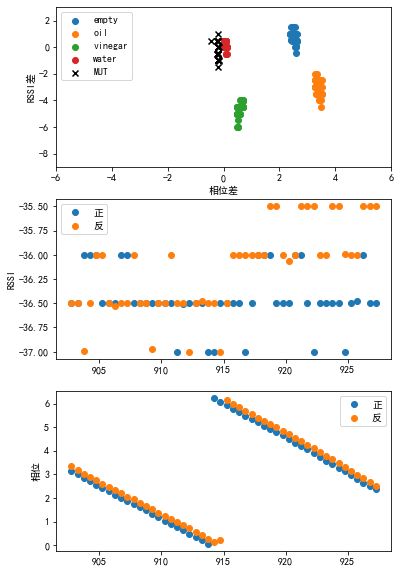

In [63]:
plt.figure(figsize=(6, 10))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

for matl in features.keys():
    phase_diff, rssi_diff = features[matl]
    ax1.scatter(phase_diff, rssi_diff)

ax1.scatter(diff_p, diff_r, marker='x', c='black')
ax1.set_xlim([-6, 6])
ax1.set_ylim([-9, 3])
ax1.set_xlabel('相位差')
ax1.set_ylabel('RSSI差')

ax1.legend(list(features.keys()) + ['MUT'])

ax2.scatter(df_f['CHANNEL'], df_f['RSSI'])
ax2.scatter(df_t['CHANNEL'], df_t['RSSI'])
ax2.legend(['正', '反'])
ax2.set_ylabel('RSSI')

ax3.scatter(df_f['CHANNEL'], df_f['PHASE'])
ax3.scatter(df_t['CHANNEL'], df_t['PHASE'])
ax3.legend(['正', '反'])
ax3.set_ylabel('相位')

['empty', 'oil', 'vinegar', 'water']